## Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import os

## Data Preparation

Text(0.5, 1.0, 'Natural Gas Prices (Filled)')

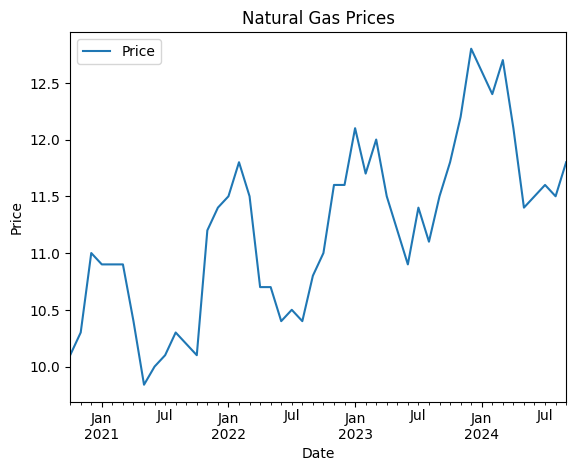

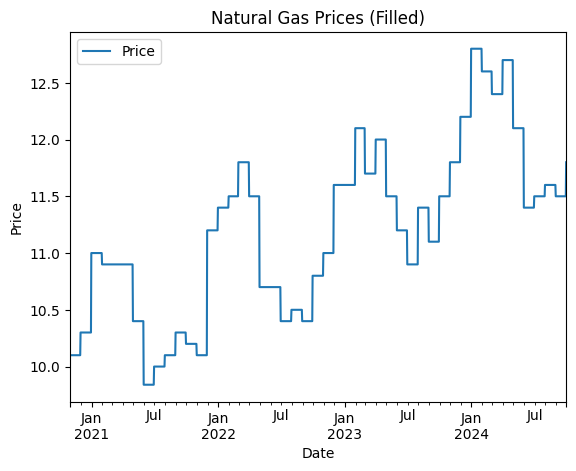

In [35]:
# Import the dataset with headers
cwd = os.getcwd()
# read csv using cwd
df = pd.read_csv(cwd +'/Nat_Gas.csv', header=0, delimiter=',', names=['Date', 'Price'])
# df = pd.read_csv('Documents/courses/comp432/project/Gas-Price-Estimator/Nat_Gas.csv', header=0, delimiter=',', names=['Date', 'Price'])

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

# Data visual
plt = df.plot()
plt.set_xlabel('Date')
plt.set_ylabel('Price')
plt.set_title('Natural Gas Prices')

# Fill in missing date values
date_range = pd.date_range(start='10/31/2020', end='9/30/2024', freq='D')
missing_dates = date_range[~date_range.isin(df.index)]
data_reindexed = df.reindex(date_range)
data_filled_forward = data_reindexed.fillna(method="ffill")

# Data visual
plt = data_filled_forward.plot()
plt.set_xlabel('Date')
plt.set_ylabel('Price')
plt.set_title('Natural Gas Prices (Filled)')

## Checking for Autocorrelation

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

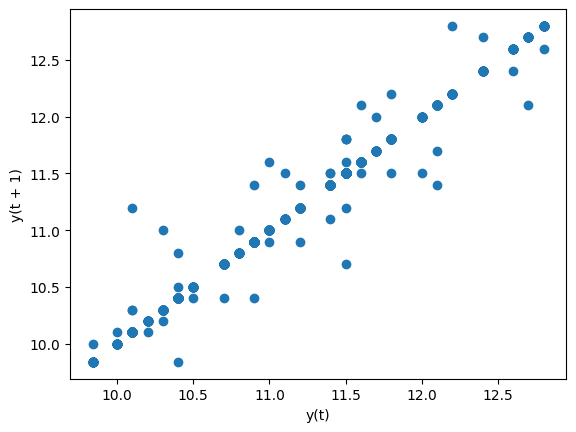

In [36]:
pd.plotting.lag_plot(data_filled_forward['Price'])

## AutoRegression Model to Predict Gas Prices One Year into the Future

Test RMSE: 0.292


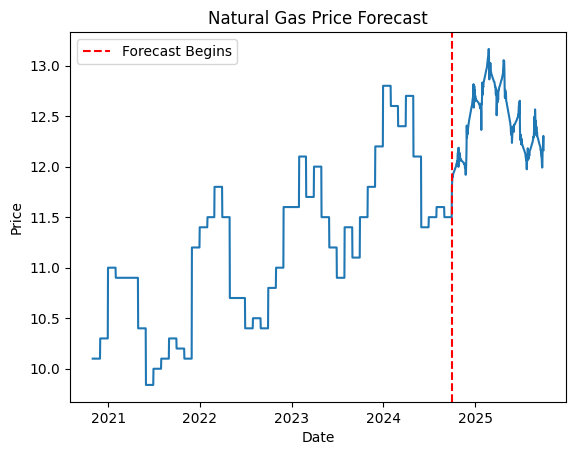

In [37]:
# data prep
X = data_filled_forward['Price'].values
train, test = X[1:len(X)-365], X[len(X)-365:]

# model fitting
model = AutoReg(train, lags=364)
model_fit = model.fit()

# make predictions for test data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# make predictions for a year in the future
forecast = model_fit.predict(start=len(X)+1, end=len(X)+365)

# add a date range from 9/30/24 to 9/30/25 into our data
date_range = pd.date_range(start='10/31/2020', end='9/30/2025', freq='D')
data_reindexed = data_filled_forward.reindex(date_range)

# add the forecast values to the last 365 valyes to the data_filled_forward 
data_reindexed['Price'][-365:] = forecast

# plot the forecast with the data_filled_forward
pyplot.plot(data_reindexed['Price'])
# labels
pyplot.xlabel('Date')
pyplot.ylabel('Price')
pyplot.title('Natural Gas Price Forecast')
pyplot.axvline(x=data_reindexed.index[-365], color='r', linestyle='--', label='Forecast Begins')
pyplot.legend()
pyplot.show()


# # print price value at 07/01/2025
# print(data_reindexed['Price']['07/01/2025'])


## Estimator using User Input

In [38]:
print("Enter the date you would like to know the price estimate for (mm/dd/yyyy): ")
print("This model predicts from 10/31/2020 to 9/30/2025")
user_string = str(input().strip())

print("Price Prediction for", user_string,": ",data_reindexed['Price'][user_string])

Enter the date you would like to know the price estimate for (mm/dd/yyyy): 
This model predicts from 10/31/2020 to 9/30/2025
Price Prediction for 01/01/25 :  12.69481729928112
